## XGBoost(eXtra Gradient Boost)
### XGBoost 개요

XGBoost는 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나이다.

유명한 캐글 경연 대회(Kaggle Contest)에서 상위를 차지한 많은 데이터 과학자가 XGBoost를 이용하면서 널리 알려졌다.

압도적인 수치의 차이는 아니지만, 분류에 있어서 일반적으로 다른 머신러닝보다 뛰어난 예측 성능을 나타낸다.

XGBoost는 GBM에 기반하고 있지만, GBM의 단점인 느린 수행 시간 및 과적합 규제(Regularization) 부재 등의 문제를 해결해서 매우 각광을 받고 있다.

특히 XGBoost는 병렬 CPU 환경에서 병렬 학습이 가능해 기존 GBM보다 빠르게 학습을 완료할 수 있다.

<br>

---



### 파이썬 래퍼 XGBoost 하이퍼 파라미터

GBM(Gradient Boosting Machine)의 하이퍼 파라미터를 어느정도 이해했으면 XGBoost 하이퍼 파라미터도 이해하는데 큰 어려움이 없다.

XGBoost는 GBM과 유사한 하이퍼 파라미터를 동일하게 가지고 있으며, 여기에 조기 중단(early stopping), 과적합을 규제하기 위한 하이퍼 파라미터 등이 추가됐다.

XGBoost는 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능을 가지고 있다.

또한 XGBoost는 기본 GBM에서 부족한 다른 여러 가지 성능 향상 기능이 있다.

그 중에 수행 속도를 향상시키기 위한 대표적인 기능으로 조기 중단(Early Stopping) 기능이 있다.

기본 GBM의 경우 n_estimators(또는 num_boost_rounds)에 지정된 횟수만큼 반복적으로 학습 오류를 감소시키며 학습을 진행하면서 중간에 반복을 멈출 수 없고 n_estimators에 지정된 횟수를 다 완료해야 한다.

XGBoost, 그리고 뒤에서 소개할 LightGBM은 모두 조기 중단 기능이 있어서 n_estimators에 지정한 부스팅 반복 횟수에 도달하지 않더라도 예측 오류가 더 이상 개선되지 않으면 반복을 끝까지 수행하지 않고 중지해 수행 시간을 개선할 수 있다.

예를 들어 n_estimators를 200으로 설정하고 조기 중단 파라미터 값을 50으로 설정하면, 1부터 200회까지 부스팅을 반복하다가 50회를 반복하는 동안 학습 오류가 감소하지 않으면 더 이상 부스팅을 진행하지 않고 종료한다.

<br><br>

---

### 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

위스콘신 유방암 데이터 세트를 활용하여 파이썬 래퍼 XGBoost API의 사용법을 살펴본다.

XG Boost의 파이썬 패키지인 xgboost는 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화(plotting) 기능을 가지고 있다.    
또한 조기 중단 기능이 있어서 num_rounds로 쩡한 부스팅 반복 횟수에 도달하지 않더라도 더 이상 예측 오류가 개선되지 않으면 반복을 끝까지 수행하지 않고 중지해 수행 시간을 개선하는 기능도 가지고 있다.

일반적으로 수행 성능 향상 XGBoost는 GBM와는 다르게 병렬 처리와 조기 중단 등으로 빠른 수행시간 처리가 가능하지만, CPU 코어가 많지 않은 개인용 PC에서는 수행시간 향상을 경험하기 어려울 수도 있다.

---
<br>

위스콘신 유방암 데이터 세트는 종용의 크기, 모양 등의 다양한 속성값을 기반으로 악성 종양(malignant)인지 양성 종양(benign)인지를 분류한 데이터 세트입니다.

종양은 양성 종양(benign tumor)과 악성 종양(malignant tumor)으로 구분할 수 있으며,

양성 종양이 비교적 성장 속도가 느리고 전이되지 않는 것에 반해, 악성 종양은 주위 조직에 침입하면서 빠르게 성장하고 신체 각 부위에 확산되거나 전이되어 생명을 위협한다.

위스콘신 유방암 데이터 세트에 기반해 종양의 다양한 피처에 따라 악성 종양(malignant)인지 일반 양성종양(benign)인지를 XGBoost를 이용해 예측한다.



In [1]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

In [4]:
cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [5]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [6]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


파이썬 래퍼 XGBoost는 사이킷런과 차이가 여러 가지 있지만, 

먼저 눈에 띄는 차이는 학습용과 테스트용 데이터 세트를 위해 별도의 객체인 DMatrix를 생성한다는 점이다.

DMatrix는 주로 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost만의 전용 데이터 세트이다.

DMatrix의 주요 입력 파라미터는 data와 label이다. data는 피처 데이터 세트이며, label은 분류의 경우에는 레이블 데이터 세트, 회귀에 경우는 숫자형인 종속값 데이터 세트이다.

DMatrix는 넘파이 외에 libsvm txt 포맷 파일, xgboost 이진 버퍼 파일을 파라미터로 입력받아 변환할 수 있다. 판다스의 DataFrame으로 데이터 인터페이스를 하기 위해 DataFrame.values를 이용해 넘파이로 일차 변환한 뒤에 이를 이용해 DMatrix 변환을 적용한다.

In [7]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [8]:
params = {
    'max_depth':3,
    'eta': 0.1,
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    'early_stoppings':100
}

num_rounds = 400

위에 지정된 하이퍼 파라미터로 XGBoost 모델을 학습시킨다.

파이썬 래퍼 XGBoost는 하이퍼 파라미터를 xgboost 모듈의 train() 함수에 파라미터로 전달한다(사이킷런의 경우는 Estimator의 생성자를 하이퍼 파라미터로 전달하는 데 반해 차이가 있다)

학습 시 XGBoost는 수행 속도를 개선하기 위해서 조기 중단 기능을 제공한다.

앞에서도 설명했듯이 조기 중단은 XGBoost가 수행성능을 개선하기 위해 더 이상 지표 개선이 없을 경우에 num_boost_round 횟수를 모두 채우지 않고 중간에 반복을 빠져 나올 수 있도록 하는 것이다.

early_stopping_rounds 파라미터를 설정해 조기 중단을 수행하기 위해서는 반드시 eval_set과 eval_metric이 함께 설정돼야 한다. Xgboost는 반복마다 eval_set으로 지정된 데이터 세트에서 eval_metric의 지정된 평가 지표로 예측 오류를 측정한다.

* eva_set는 성능 평가를 수행할 평가용 데이터 세트를 설정
* eval_metric은 평가 세트에 적용할 성능 평가 방법. 분류일 경우 주로 'error'(분류 오류), 'logloss'를 적용.

evals 파라미터에 학습 데이터 세트와 eval 데이터 세트를 명기해주면 평가를 eval 데이터 세트에 수행하면서  조기 중단을 적용할 수 있다.

조기 중단을 수행하려면 반드시 evals 파라미터에 eval 데이터 세트를 명기해줘야 한다.

이제 xgboost 모듈의 train() 함수를 호출하면 학습을 수행한다.

이 때 반복 시마다 evals에 표시된 데이터 세트에 대해 평가 지표 결과가 출력된다.

train()은 학습이 완료된 모델 객체를 반환한다.

In [9]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기한다.

wlist = [(dtrain, 'train'), (dtest, 'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)

[0]	train-logloss:0.609688	eval-logloss:0.61352
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.540803	eval-logloss:0.547843
[2]	train-logloss:0.483753	eval-logloss:0.494248
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354146	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292593	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207938	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logl

train() 으로 학습을 수행하면 반복 시 train-error와 eval-logloss가 지속적으로 감소한다.

xgboost를 이용해 모델의 학습이 완료됐으면 이를 이용해 테스트 데이터 세트에 예측을 수행한다.

파이썬 래퍼 XGBoost는 train() 함수를 호출해 학습이 완료된 모델 객체를 반환하게 되는데,

이 모델 객체는 예측을 위해 predict() 메서드를 이용한다.

한 가지 유의할 점은 사이킷런의 predict() 메서드는 예측 결과 클래스 값(즉, 0, 1)을 반환하는 데 반해 xgboost의 predict()는 예측 결괏값이 아닌 예측 결과를 추정할 수 있느 확률 값을 반환한다는 것이다.

In [10]:
 pred_probs = xgb_model.predict(dtest)
 print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
 print(np.round(pred_probs[:10], 3))

 # 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix( y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-AUC 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [21]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806, AUC:0.9951



이번에는 xgboost 패키지에 내장된 시각화 기능을 수행한다.

xgboost의 plot_importance() API는 피처의 중요도를 막대그래프 형식으로 나타낸다.

기본 평가 지표로 f1 스코어를 기반으로 해 각 피처의 중요도를 나타낸다.

사이킷런은 Estimator 객체의 feature_importances_ 속성을 이용해 직접 시각화 코드를 작성해야 하지만, xgboost 패키지는 plot_importance()를 이용해 바로 피처 중요도를 시각화할 수 있다.

plot_importance() 호출 시 파라미터로 앞에서 학습이 완료된 모델 객체 및 맷플롯립의 ax 객체를 입력하기만 하면 된다.

내장된 plot_importance() 이용 시 유의 할 점은 xgboost 넘파이 기반의 피처 데이터로 학습 시에 피처명을 제대로 알 수 가 없으므로 f0, f1와 같이 피처 순서별로 f자 뒤에 순서를 붙여서 X축에 피처들로 나열한다. (즉 f0은 첫 번째 피처, f1는 두 번째 피처를 의미한다.)

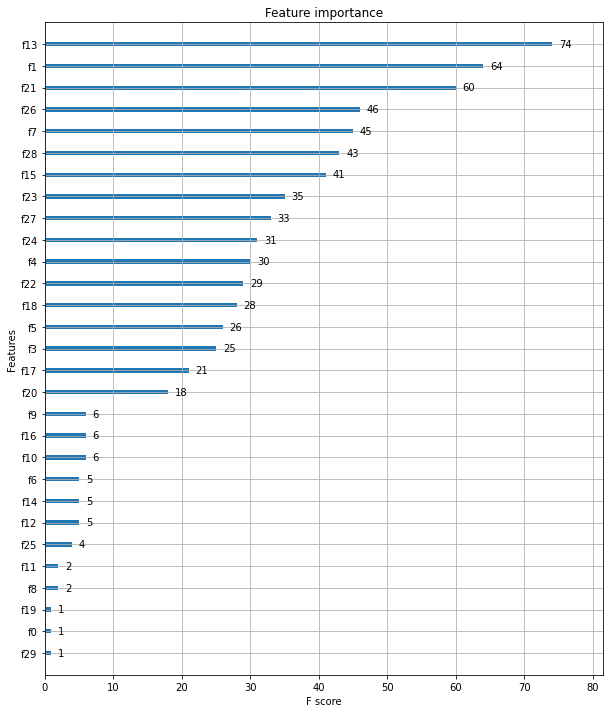

In [22]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

### 사이킷런 래퍼 XGBoost의 개요 및 적용

사이킷 런을 위핸 래퍼 XGBoost는 크게 분류를 위핸 래퍼 클래스인 XGBClassifier, 회귀를 위한 래퍼 클래스인 XGBRegressor이다.


XGBClassifier 클래스의 fit(), predict(), predict_proba()를 이용해 학습과 예측을 수행한다.

In [24]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [25]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806, AUC:0.9951


In [27]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

n_estimators를 400으로 설정하고 400번 반복을 수행하지 않고 311번 반복한 후 학습을 완료했음을 확인할 수 있다.

조기 중단으로 학습된 XGBClassifier의 예측 성능을 살펴본다.   
조기 중단이 적용되지 않은 결과보다 약간 저조한 성능을 나타냈지만 큰 차이는 아니다.

In [28]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870, F1: 0.9744, AUC:0.9954


하지만 조기 중단값을 너무 급격하게 줄이면 예측 성능이 저하될 우려가 크다.

만일 early_stopping_rounds를 10으로 하면 아직 성능이 향상될 여지가 있음에도 불구하고 10번 반복하는 동안 성능 평가 지표가 향상되지 않으면 반복이 멈춰 버려서 충분한 학습이 되지 않아 예측 성능이 나빠질 수 있다.

early_stopping_rounds를 10으로 설정하고 예측 성능을 다시 측정해 본다.


In [29]:
# early_stopping_rounds를 10으로 설정하고 재 학습

xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


피처의 중요도를 시각화하는 모듈인 plot_importance() API를 통해 시각화한다.

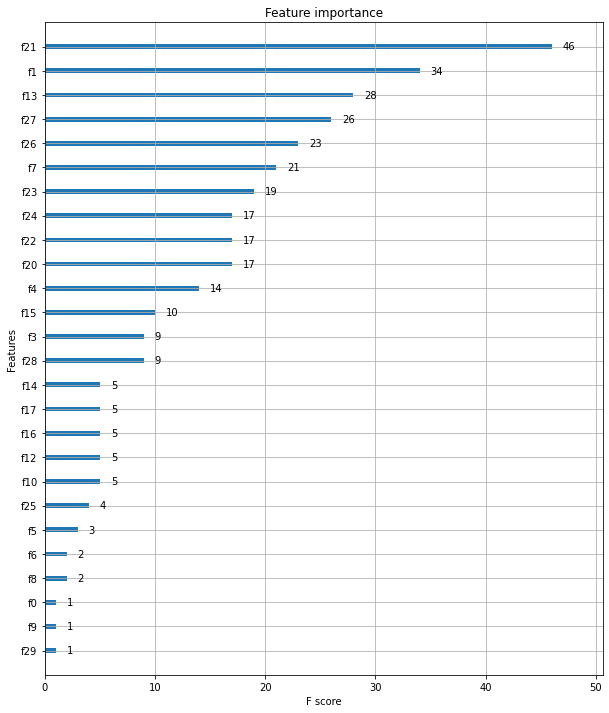

In [31]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 Wrapper 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)